# Sales Analysis

#### Import Libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style("darkgrid")

#### Merging 12 months of Sales Data into a Single CSV file

In [2]:
all_months_data = pd.DataFrame()

files = [file for file in os.listdir('./Sales_Data/')]

for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data,df])
    
all_months_data.to_csv("all_data.csv", index=False)


#### Read in Updated dataframe

In [3]:
all_data = pd.read_csv('./all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
all_data.shape

(186850, 6)

In [5]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

## Clean up the data!

- The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

In [6]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Drop rows of NAN

In [7]:
all_data.dropna(how='all', inplace=True)

In [8]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [9]:
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


#### Find duplicate 'Or' and delete it

In [10]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']


### Augment data with additional columns for Analysis

#### Add Month Coulmn

In [11]:
all_data["Month"] = all_data["Order Date"].str[:2]
all_data["Month"] = all_data["Month"].astype('int32')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


### Adding Sales Column

#### Convert Columns to Correct datatype

In [12]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

In [13]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]

In [14]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


### Alternative Method to add Month Column

In [15]:
all_data["Month_2"] = pd.to_datetime(all_data["Order Date"]).dt.month

In [16]:
all_data["year"] = pd.to_datetime(all_data["Order Date"]).dt.year

In [17]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Month_2,year
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,4,2019
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,4,2019
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,4,2019
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,4,2019
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,4,2019
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,9,2019
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,9,2019
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,9,2019
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,9,2019


In [18]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(" ")[1]

all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")

## Data Exploration

### Question1: What was the best month for sales? How much was earned that month?

In [19]:
results = all_data.groupby("Month").sum()

In [20]:
results

,Quantity Ordered,Price Each,Sales,Month_2,year
Month,,,,,
1,10903,1.811768e+06,1.822257e+06,9709,19602505
2,13449,2.188885e+06,2.202022e+06,23950,24177525
3,17005,2.791208e+06,2.807100e+06,45459,30593907
4,20558,3.367671e+06,3.390670e+06,73116,36905301
5,18667,3.135125e+06,3.152607e+06,82830,33446754
6,15253,2.562026e+06,2.577802e+06,81324,27365526
7,16072,2.632540e+06,2.647776e+06,100051,28857567
8,13448,2.230345e+06,2.244468e+06,95688,24149259
9,13109,2.084992e+06,2.097560e+06,104589,23462799


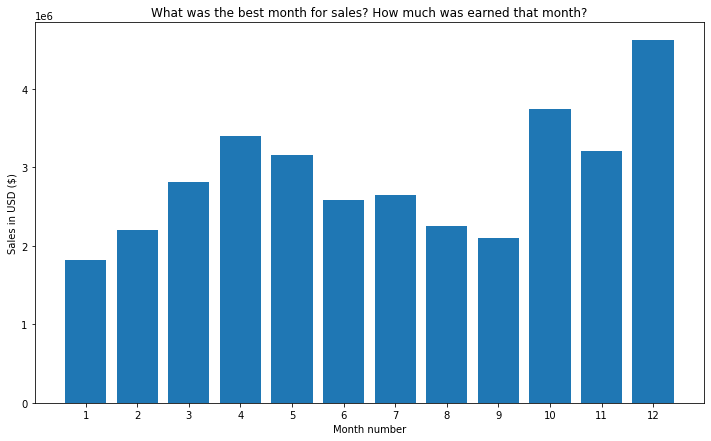

In [21]:
plt.figure(figsize=(12,7))
plt.bar(results.index,results["Sales"])
plt.xticks(results.index)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.title("What was the best month for sales? How much was earned that month?")
plt.show()

##### December was the best month for sales, with the estimated sale of 4.6 million dollars.


### Question2: What City has the highest number of Sales?

In [22]:
#Lets use ,apply()

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Month_2,year,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,4,2019,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,4,2019,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,4,2019,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,4,2019,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,4,2019,Los Angeles (CA)


In [23]:
all_data.groupby("City").sum().sort_values("Sales", ascending=False)

,Quantity Ordered,Price Each,Month,Sales,Month_2,year
City,,,,,,
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06,315520,90313920
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06,208325,59772496
New York City (NY),27932,4.635371e+06,175741,4.664317e+06,175741,50224654
Boston (MA),22528,3.637410e+06,141112,3.661642e+06,141112,40246750
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06,104794,30044739
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06,104620,29921582
Seattle (WA),16553,2.733296e+06,104941,2.747755e+06,104941,29743909
Portland (OR),11303,1.860558e+06,70621,1.870732e+06,70621,20210192
Austin (TX),11153,1.809874e+06,69829,1.819582e+06,69829,19998197


In [24]:
result2 = all_data.groupby("City").sum()

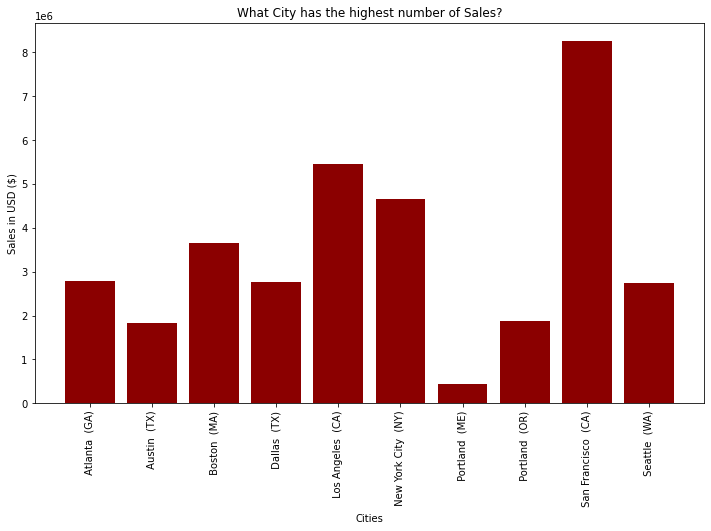

In [25]:
plt.figure(figsize=(12,7))

plt.bar(result2.index, result2.Sales, color='darkred')
plt.xticks(result2.index, rotation = 'vertical')
plt.xlabel("Cities")
plt.ylabel("Sales in USD ($)")
plt.title("What City has the highest number of Sales?")
plt.show()

##### San Francisco (CA) has reported highest number of sales with approximately 8.26 Million Dollars. 

### Question3: What time should the advertisments to be displayed inorder to maximize the likelihood of customer's buying product?

In [26]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

In [27]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Month_2,year,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,4,2019,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,4,2019,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,4,2019,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,4,2019,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,4,2019,Los Angeles (CA)


In [28]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute

In [29]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Month_2,year,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,4,2019,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,4,2019,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,4,2019,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,4,2019,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,4,2019,Los Angeles (CA),9,27


In [30]:
all_data.Hour.value_counts()

19    12905
12    12587
11    12411
18    12280
20    12228
13    12129
14    10984
10    10944
21    10921
17    10899
16    10384
15    10175
22     8822
9      8748
23     6275
8      6256
7      4011
0      3910
6      2482
1      2350
5      1321
2      1243
4       854
3       831
Name: Hour, dtype: int64

In [31]:
result3 = all_data.groupby('Hour').sum()

In [32]:
all_data.groupby(['Hour']).count().Sales

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Sales, dtype: int64

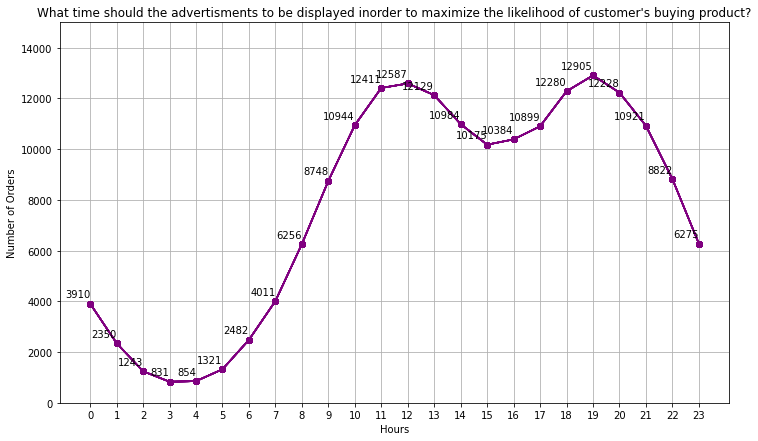

In [33]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
#plt.figure(figsize=(12,7))

plt.plot(result3.index, all_data.groupby(['Hour']).count(), marker='o', color = 'purple')
plt.xticks(result3.index)
plt.grid()

plt.xlabel("Hours")
plt.ylabel("Number of Orders")

for i, v in enumerate(all_data.groupby(['Hour']).count().Sales):
    ax.text(i, v+250, "%d" %v, ha="right")
plt.ylim(0, 15000)
plt.title("What time should the advertisments to be displayed inorder to maximize the likelihood of customer's buying product?")
plt.show()

### Question4: What products are most often sold together?

In [34]:
all_data["Order ID"].value_counts()

160873    5
194253    4
304802    4
277875    4
212334    4
         ..
205102    1
282270    1
156859    1
254092    1
302873    1
Name: Order ID, Length: 178437, dtype: int64

In [35]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data["Order ID"].duplicated(keep = False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df["Grouped"] = df.groupby("Order ID")['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

<ipython-input-35-55944a73c214>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"] = df.groupby("Order ID")['Product'].transform(lambda x: ','.join(x))


In [36]:
df

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [37]:
df[df.Grouped == "iPhone,Lightning Charging Cable"].count()

Order ID    882
Grouped     882
dtype: int64

In [38]:
df[df.Grouped == "Lightning Charging Cable,iPhone"].count()

Order ID    9
Grouped     9
dtype: int64

In [39]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    #count.update(Counter(combinations(row_list, 3)))

    
for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question5: What product sold the most? Why do you think it sold the most?

In [40]:
product_group = all_data.groupby('Product').sum()["Quantity Ordered"]
product_group.sort_values(ascending= False)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

In [41]:
product_group.keys()

Index(['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor',
       '34in Ultrawide Monitor', 'AA Batteries (4-pack)',
       'AAA Batteries (4-pack)', 'Apple Airpods Headphones',
       'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone',
       'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable',
       'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable',
       'Vareebadd Phone', 'Wired Headphones', 'iPhone'],
      dtype='object', name='Product')

In [42]:
product_group.values

array([ 4129,  6244,  7550,  6199, 27635, 31017, 15661, 13457,  4819,
        5532,   646,   666, 23217,  4728,  4130, 23975,  2068, 20557,
        6849], dtype=int64)

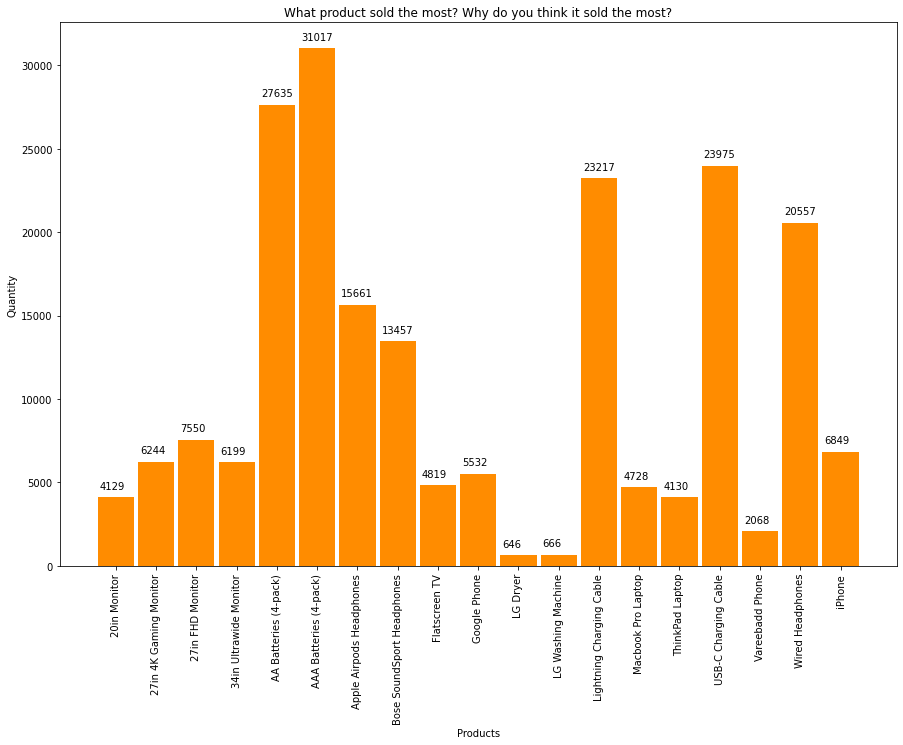

In [43]:
plt.figure(figsize=(15,10))

plt.bar(product_group.index, product_group.values, width= 0.9, align='center',color='darkorange')
plt.xticks(product_group.index, rotation = 'vertical')

i = 1.0
j = 500
for i in range(len(product_group.index)):
    plt.annotate(product_group.values[i], (-0.4 + i, product_group.values[i] + j))
plt.xlabel("Products")
plt.ylabel("Quantity")
plt.title("What product sold the most? Why do you think it sold the most?")
plt.show()


In [44]:
prices = all_data.groupby('Product').mean()["Price Each"]

In [45]:
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

<ipython-input-49-7bb24ccbeadd>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product_group.index, rotation = 'vertical')


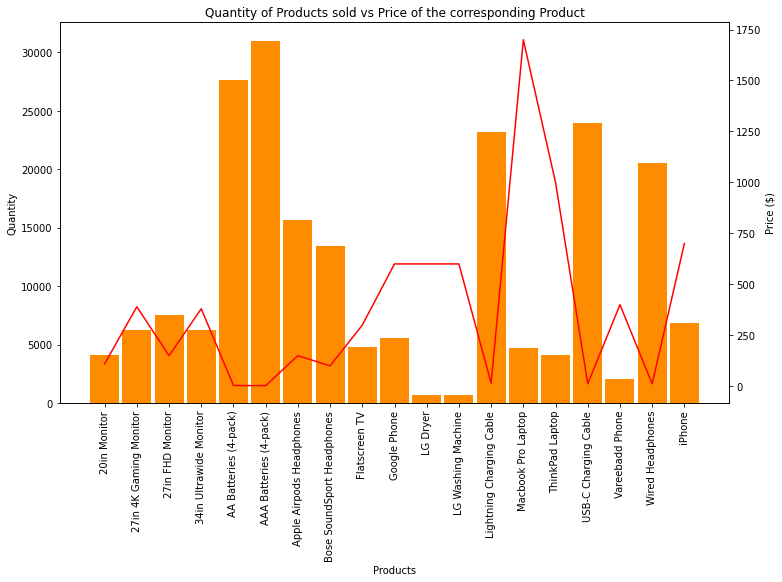

In [49]:

fig,ax1 = plt.subplots(figsize=(12, 7))

ax2 = ax1.twinx()
ax1.bar(product_group.index, product_group.values, width= 0.9, align='center',color='darkorange')
ax2.plot(product_group.index, prices , 'r-')
ax1.set_xlabel("Products")
ax1.set_ylabel("Quantity")
ax2.set_ylabel("Price ($)")
ax1.set_xticklabels(product_group.index, rotation = 'vertical')
plt.title("Quantity of Products sold vs Price of the corresponding Product")
plt.show()

## Summary

- December was the best month for sales out of all other months, with the estimated sale of \\$4.6 million and the lowest sale was reported in January of approximately \$1.8 Million.
- San Francisco (CA) has reported highest number of sales with approximately 8.26 Million Dollars followed by Los Angeles and New york by approximately 5.45 and 4.66 Million Dollars. The least number of Sale was reported in Portland(ME) of approximately 0.44 Million Dollars in "Ten" Months.
- Iphone and Lightning Charging cable were the two products that were sold "1005" times together, after which ('Google Phone', 'USB-C Charging Cable') with 987 times and ('iPhone', 'Wired Headphones') with 447 times were the most popular combination of products that were sold together.
- The most sold products in 10 months were AAA Batteries (4-Pack) and AA Batteries (4-Pack) with the quantity of 31017 and 27635 and least sold products reported were LG Washing Machine and LG Dryer with the quantity of 666 and 646. 
- One reason of the high sale of AAA and AA Batteries is the low-cost of the products which are 2.99\\$ and 3.84\\$ respectively, however in contrast LG Washing Machine and LG Dryer which are sold at 600 \$ each.